# Thoughts

- Should we have two models? One if they have a credit history with Home Credit before (info in credit_card_balance, installments_payments)

In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
#Graph Settings 

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import lines
from matplotlib import colors
import matplotlib.dates as mdates
#%matplotlib inline
import matplotlib.ticker as mtick
import matplotlib.lines as mlines


mpl.rcParams['figure.figsize'] = [12,6]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlepad'] = 25
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.labelweight'] = 'normal'
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['text.usetex'] = False
mpl.rcParams['figure.titleweight'] = 'normal'
mpl.rcParams['font.family'] = 'Sans'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['ytick.labelleft'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.color'] = 'lightgrey'
mpl.rcParams['xtick.color'] = 'lightgrey'
mpl.rcParams['text.color'] = 'lightgrey'
mpl.rcParams['axes.titlecolor'] = 'lightgrey'
mpl.rcParams['axes.labelcolor'] = 'lightgrey'
mpl.rcParams['axes.edgecolor'] = 'lightgrey'

mpl.rcParams['date.autoformatter.year'] = '%Y'
mpl.rcParams['date.autoformatter.month'] = '%b-%Y'
#change background color to transparent
mpl.rcParams['figure.facecolor'] = '#282c34'
#change plot foreground color to grey
mpl.rcParams['axes.facecolor'] = '#282c34'

#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#00396f", "#a12830", '#00ab39',"#ffe312",'#c41e98','#008000','#ff5e00','#00a6d4','#6c1b72'])
#change default color cycler to ggplot
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#57D7BA','#f78948','#87CEFA','#B18FCF','#fe5555','#2F3F4D']) 
mpl.rcParams['lines.linewidth'] = 2
colors = ['#57D7BA','#f78948','#87CEFA','#B18FCF','#fe5555','#2F3F4D']
#colors = ["#00396f", "#a12830", '#00ab39',"#ffe312",'#c41e98','#008000','#ff5e00','#00a6d4','#6c1b72']

In [329]:
def plot_bar_graph(col, ylim_min = None, ylim_max = None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(x = application_train_df.groupby(col).agg({'target':'mean','sk_id_curr':'count'})['target'].index, height = application_train_df.groupby(col).agg({'target':'mean','sk_id_curr':'count'})['target'].values)

    if ylim_min or ylim_max:
        ax.set_ylim(ylim_min,ylim_max)


In [3]:
data_files = os.listdir('./data')

In [4]:
dataframe_names = {}
for file in data_files:
    dataframe_names[file] = file.lower().replace('.csv','') + '_df'

In [5]:
# {'application_test.csv': 'application_test_df',
#  'application_train.csv': 'application_train_df',
#  'bureau.csv': 'bureau_df',
#  'bureau_balance.csv': 'bureau_balance_df',
#  'credit_card_balance.csv': 'credit_card_balance_df',
#  'HomeCredit_columns_description.csv': 'homecredit_columns_description_df',
#  'installments_payments.csv': 'installments_payments_df',
#  'POS_CASH_balance.csv': 'pos_cash_balance_df',
#  'previous_application.csv': 'previous_application_df',
#  'sample_submission.csv': 'sample_submission_df'}
application_test_df = pd.read_csv('./data/application_test.csv', encoding='latin-1')
application_train_df = pd.read_csv('./data/application_train.csv', encoding='latin-1')
bureau_df = pd.read_csv('./data/bureau.csv', encoding='latin-1')
bureau_balance_df = pd.read_csv('./data/bureau_balance.csv', encoding='latin-1')
credit_card_balance_df = pd.read_csv('./data/credit_card_balance.csv', encoding='latin-1')
homecredit_columns_description_df = pd.read_csv('./data/HomeCredit_columns_description.csv', encoding='latin-1')
installments_payments_df = pd.read_csv('./data/installments_payments.csv', encoding='latin-1')
pos_cash_balance_df = pd.read_csv('./data/POS_CASH_balance.csv', encoding='latin-1')
previous_application_df = pd.read_csv('./data/previous_application.csv', encoding='latin-1')
#sample_submission_df = pd.read_csv('./data/sample_submission.csv', encoding='latin-1')

In [339]:
#pd display max 200 columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 70)

In [18]:
#for each dataframe, change the column names to lower case
application_test_df.columns = application_test_df.columns.str.lower()
application_train_df.columns = application_train_df.columns.str.lower()
bureau_df.columns = bureau_df.columns.str.lower()
bureau_balance_df.columns = bureau_balance_df.columns.str.lower()
credit_card_balance_df.columns = credit_card_balance_df.columns.str.lower()
homecredit_columns_description_df.columns = homecredit_columns_description_df.columns.str.lower()
installments_payments_df.columns = installments_payments_df.columns.str.lower()
pos_cash_balance_df.columns = pos_cash_balance_df.columns.str.lower()
previous_application_df.columns = previous_application_df.columns.str.lower()
#sample_submission_df.columns = sample_submission_df.columns.str.lower()

,unnamed: 0,table,row,description,special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


## Areas to Explore
- What Interest Rate did they give them? Can we estimate this? (would be their view of how risky)

In [20]:
bureau_df

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


## Buearu Balance

Description:

- Monthly balances of previous credits in Credit Bureau.

- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- measuring DPD status (Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] ))

- Hypotheses: 
    - Risk slopes with current DPD status
    - People who were of higher DPD status in the last year or so (or ever were), even if they improved, might be slightly higher risk. Could get the max over different time horizons
    - The # of months someone has had clean credit for since they were in some DPD status. If they never were, then we can assign it to the max? -- Probably not the best idea here considering the varying lengths of credit

In [218]:
bureau_balance_df['status'].isna().sum()

0

In [219]:
def dpd_status_to_int(status):
    if status == 'X' or status == 'C':
        return 0
    else:
        return int(status)

In [220]:
bureau_balance_df['dpd_status'] = bureau_balance_df['status'].apply(dpd_status_to_int)

In [221]:
bureau_balance_df.sort_values(by=['sk_id_bureau','months_balance'], ascending= False, inplace=True)

In [222]:
bureau_balance_df['max_dpd_status'] = bureau_balance_df['sk_id_bureau'].map(bureau_balance_df.groupby('sk_id_bureau')['dpd_status'].max().to_dict())

In [225]:
bureau_balance_df.loc[bureau_balance_df['months_balance'] >= -3].groupby('months_balance').agg({'sk_id_bureau':pd.Series.nunique})

,sk_id_bureau
months_balance,
-3,615080
-2,619243
-1,622601
0,610965


In [227]:
#every month, more or less, most people are accounted for
len(bureau_balance_df['sk_id_bureau'].unique())

817395

In [179]:
bureau_balance_df.set_index(['sk_id_bureau','months_balance'], inplace=True)
bureau_balance_df.sort_index(ascending=True,inplace=True)

In [ ]:
#bureau_balance_df['mo6_max_dpd_status']
bureau_balance_df['mo6_max_dpd_status'] = bureau_balance_df.groupby(level = 'sk_id_bureau')['dpd_status'].apply(lambda x : x.rolling(6,min_periods= 6).max()).droplevel(0)
bureau_balance_df['mo12_max_dpd_status'] = bureau_balance_df.groupby(level = 'sk_id_bureau')['dpd_status'].apply(lambda x : x.rolling(12,min_periods= 12).max()).droplevel(0)
bureau_balance_df['mo24_max_dpd_status'] = bureau_balance_df.groupby(level = 'sk_id_bureau')['dpd_status'].apply(lambda x : x.rolling(24,min_periods= 24).max()).droplevel(0)

In [190]:
bureau_balance_df.reset_index(inplace=True)

In [192]:
bureau_balance_df = bureau_balance_df.loc[bureau_balance_df['months_balance'] == 0]

In [194]:
bureau_balance_df.describe()

,sk_id_bureau,months_balance,dpd_status,max_dpd_status,mo6_max_dpd_status,mo12_max_dpd_status,mo24_max_dpd_status
count,6.109650e+05,610965.0,610965.000000,610965.000000,565988.000000,485706.000000,353188.000000
mean,6.041796e+06,0.0,0.017654,0.176226,0.044784,0.059040,0.071523
std,4.909131e+05,0.0,0.228506,0.586767,0.304365,0.348113,0.389508
min,5.001709e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.738839e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.076848e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.434717e+06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.842888e+06,0.0,5.000000,5.000000,5.000000,5.000000,5.000000


# Bureau
- Total Number of credit lines
- Number of Active Credit Lines Open
- Max Days Credit (credit history)
- Avg length of credit (avg across all loans)
- Average Credit utilization
- Could do something with the annuity column. If there is an annuity at all? Maybe could back into the APY to see how risky other lenders perceive them to be?
- Amount of credit lines opened in past year

In [195]:
bureau_df

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [ ]:
bureau_df

In [197]:
#Sold/ Bad Debt is such a small percentage that it's probably not worth using in the model, although this would be a strong predictor of default for that subset
bureau_df['credit_active'].value_counts()

credit_active
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [199]:
bureau_df['credit_type'].value_counts()

credit_type
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [198]:
bureau_df.loc[((bureau_df['credit_active'] == 'Closed') & (bureau_df['amt_credit_sum_debt'] > 0))]

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
333,182982,5714892,Closed,currency 1,-1431,0,-884.0,-883.0,NaN,0,169987.5,70416.00,NaN,0.0,Consumer credit,-627,NaN
361,299495,5714936,Closed,currency 1,-1638,0,855.0,-587.0,0.0,0,135000.0,473925.33,25574.67,0.0,Credit card,-587,NaN
617,172376,5715260,Closed,currency 1,-60,0,1766.0,-19.0,NaN,0,2488639.5,2488639.50,NaN,0.0,Car loan,-12,NaN
626,253382,5715270,Closed,currency 1,-1637,0,-906.0,-905.0,NaN,0,147996.0,31540.50,NaN,0.0,Consumer credit,-606,NaN
627,253382,5715271,Closed,currency 1,-1542,0,-446.0,-447.0,NaN,0,240885.0,147555.00,NaN,0.0,Consumer credit,-447,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715366,451869,5048456,Closed,currency 1,-1054,0,42.0,-597.0,NaN,0,787500.0,786060.00,NaN,0.0,Credit card,-597,0.0
1715557,374495,5042855,Closed,currency 1,-1159,0,-63.0,-740.0,NaN,0,726480.0,696046.50,NaN,0.0,Consumer credit,-740,NaN
1715946,208850,5056946,Closed,currency 1,-1248,0,-152.0,-415.0,NaN,0,681075.0,575028.00,NaN,0.0,Consumer credit,-415,NaN
1716148,204937,5049543,Closed,currency 1,-1214,0,-118.0,-220.0,NaN,0,900000.0,826083.00,NaN,0.0,Consumer credit,-218,NaN


In [200]:
bureau_df.loc[((bureau_df['credit_active'] == 'Closed') & (bureau_df['amt_credit_sum_overdue'] > 0))]

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
9446,350002,5725982,Closed,currency 1,-2276,1715,-1972.0,-1724.0,NaN,0,16186.5,0.0,0.0,585.0,Consumer credit,-1714,NaN
17100,323596,5190659,Closed,currency 1,-2261,1572,-1957.0,-1575.0,NaN,0,113094.0,0.0,0.0,220.5,Consumer credit,-1571,NaN
33723,406327,5804754,Closed,currency 1,-449,0,-87.0,-87.0,NaN,0,160879.5,9.0,NaN,9.0,Consumer credit,-87,31868.91
43881,392205,5214368,Closed,currency 1,-2591,1694,-2103.0,-1699.0,NaN,0,26995.5,0.0,0.0,9.0,Consumer credit,-1693,NaN
46064,247863,5217154,Closed,currency 1,-2355,1651,-2051.0,-1656.0,NaN,0,16929.0,0.0,0.0,54.0,Consumer credit,-1650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628047,381777,5567059,Closed,currency 1,-2669,2347,-2487.0,-2109.0,NaN,0,38898.0,0.0,0.0,36.0,Consumer credit,-428,0.00
1655616,256906,6688027,Closed,currency 1,-2611,0,-1961.0,-1961.0,NaN,0,201928.5,NaN,NaN,4.5,Credit card,-1961,0.00
1679083,163338,6654943,Closed,currency 1,-2282,2220,-2124.0,-1358.0,NaN,0,16128.0,0.0,0.0,63949.5,Consumer credit,-1338,NaN
1696803,435904,5560835,Closed,currency 1,-1175,0,-444.0,-435.0,NaN,0,133029.0,0.0,0.0,76.5,Consumer credit,-426,NaN


In [202]:
bureau_balance_df.head()

,sk_id_bureau,months_balance,status,dpd_status,max_dpd_status,mo6_max_dpd_status,mo12_max_dpd_status,mo24_max_dpd_status
96,5001709,0,C,0,0,0.0,0.0,0.0
179,5001710,0,C,0,0,0.0,0.0,0.0
183,5001711,0,X,0,0,NaN,NaN,NaN
202,5001712,0,C,0,0,0.0,0.0,NaN
224,5001713,0,X,0,0,0.0,0.0,NaN


In [203]:
a = pd.merge(bureau_df, bureau_balance_df, how='left', on='sk_id_bureau')

In [207]:
len(a.loc[a['max_dpd_status'].isna()]) / len(a)

0.6571239807320784

In [209]:
train_ids = application_train_df['sk_id_curr'].unique()

In [212]:
#Can't find a merge on 76% of the data in the training, so I guess we just avoid using it?
len(a.loc[((a['max_dpd_status'].isna() ) & (a['sk_id_curr'].isin(train_ids)))]) / len(a.loc[((a['sk_id_curr'].isin(train_ids)))])

0.7641001143091123

In [229]:
bureau_df['credit_type'].value_counts()

credit_type
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: count, dtype: int64

In [230]:
bureau_df['has_car_loan'] = bureau_df['credit_type'].apply(lambda x: 1 if x == 'Car loan' else 0)
bureau_df['has_mortgage'] = bureau_df['credit_type'].apply(lambda x: 1 if x == 'Mortgage' else 0)

In [232]:
bureau_df['closed_accounts'] = bureau_df['credit_active'].apply(lambda x: 1 if x == 'Closed' else 0)
bureau_df['active_accounts'] = bureau_df['credit_active'].apply(lambda x: 1 if x == 'Active' else 0)
bureau_df['total_accounts'] = 1

In [260]:
#make days credit positive
bureau_df['days_credit'] = bureau_df['days_credit'].abs()

In [233]:
bureau_df['credit_day_overdue'].value_counts()

credit_day_overdue
0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: count, Length: 942, dtype: int64

In [234]:
bureau_df['cnt_credit_prolong'].value_counts()

cnt_credit_prolong
0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: count, dtype: int64

In [238]:
bureau_df['has_annuity'] = bureau_df['amt_annuity'].apply(lambda x: 1 if x > 0 else 0)

In [240]:
#recent credit if it's been less than 2 years since the credit was taken out using the days_credit column
bureau_df['recent_credit'] = bureau_df['days_credit'].apply(lambda x: 1 if abs(x) < 730 else 0)

In [239]:
bureau_df.groupby('credit_type').agg({'has_annuity':'sum','sk_id_curr':'count'})

,has_annuity,sk_id_curr
credit_type,,
Another type of loan,95,1017
Car loan,4134,27690
Cash loan (non-earmarked),31,56
Consumer credit,164260,1251615
Credit card,57325,402195
Interbank credit,0,1
Loan for business development,273,1975
Loan for purchase of shares (margin lending),1,4
Loan for the purchase of equipment,4,19


In [243]:
bureau_df.describe()

,sk_id_curr,sk_id_bureau,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,days_credit_update,amt_annuity,has_car_loan,has_mortgage,closed_accounts,active_accounts,total_accounts,has_annuity,recent_credit
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1716428.0,1.716428e+06,1.716428e+06
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04,1.613234e-02,1.071469e-02,6.287901e-01,3.673950e-01,1.0,1.355851e-01,3.829383e-01
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05,1.259845e-01,1.029558e-01,4.831286e-01,4.820955e-01,0.0,3.423475e-01,4.861036e-01
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.0,0.000000e+00,1.000000e+00
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00


In [249]:
bureau_df.loc[bureau_df.amt_credit_sum_limit.notna()].groupby('credit_type').agg({'sk_id_bureau':'count'}) / bureau_df.groupby('credit_type').agg({'sk_id_bureau':'count'})

,sk_id_bureau
credit_type,
Another type of loan,0.912488
Car loan,0.403142
Cash loan (non-earmarked),1.000000
Consumer credit,0.648519
Credit card,0.707572
Interbank credit,NaN
Loan for business development,0.087089
Loan for purchase of shares (margin lending),NaN
Loan for the purchase of equipment,0.105263


In [253]:
len(bureau_df.loc[bureau_df['amt_credit_sum_debt'] > 0]) / len(bureau_df)

0.25279650530054276

In [254]:
bureau_df['amt_credit_sum_debt'].fillna(0,inplace=True)

In [257]:
#data errors I'm assuming?
bureau_df.loc[bureau_df['amt_credit_sum_debt'] > bureau_df['amt_credit_sum']]

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity,has_car_loan,has_mortgage,closed_accounts,active_accounts,total_accounts,has_annuity,recent_credit
17,238881,5714486,Active,currency 1,-381,0,NaN,NaN,NaN,0,450000.0,520920.0,NaN,0.0,Consumer credit,-4,NaN,0,0,0,1,1,0,1
51,452585,5714527,Active,currency 1,-42,0,-26.0,NaN,NaN,0,45000.0,54000.0,0.0,0.0,Consumer credit,-31,NaN,0,0,0,1,1,0,1
57,389599,5714533,Active,currency 1,-831,0,277.0,NaN,NaN,0,270000.0,274225.5,0.0,0.0,Credit card,-10,NaN,0,0,0,1,1,0,0
71,242993,5714550,Active,currency 1,-382,0,1464.0,NaN,NaN,0,58500.0,59809.5,NaN,0.0,Credit card,-341,NaN,0,0,0,1,1,0,1
187,166034,5714701,Active,currency 1,-706,0,369.0,NaN,NaN,0,459000.0,483534.0,0.0,0.0,Credit card,-4,NaN,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716200,398067,5051527,Active,currency 1,-245,0,851.0,NaN,NaN,0,729729.0,841563.0,NaN,0.0,Consumer credit,-19,NaN,0,0,0,1,1,0,1
1716206,172458,5051586,Active,currency 1,-2198,0,716.0,NaN,NaN,0,477000.0,494635.5,0.0,0.0,Credit card,-9,NaN,0,0,0,1,1,0,0
1716254,140833,5052048,Active,currency 1,-602,0,534.0,NaN,NaN,0,153000.0,159367.5,NaN,0.0,Credit card,-32,NaN,0,0,0,1,1,0,1
1716268,391091,5053479,Active,currency 1,-2361,0,-1247.0,NaN,NaN,0,0.0,171.0,0.0,0.0,Credit card,-1025,NaN,0,0,0,1,1,0,0


In [261]:
bureau_grp = bureau_df.groupby(['sk_id_curr','credit_type']).agg({'days_credit':max,'recent_credit':sum,'closed_accounts':sum,'active_accounts':sum,'total_accounts':sum,'has_mortgage':sum,'has_car_loan':sum,'amt_credit_sum':sum,'amt_credit_sum_debt':sum})

In [264]:
bureau_grp

days_credit  recent_credit  closed_accounts  \
sk_id_curr credit_type                                                    
100001     Consumer credit         1572              3                4   
100002     Consumer credit         1437              1                3   
           Credit card             1125              2                3   
100003     Consumer credit         2586              0                2   
           Credit card             1636              1                1   
...                                 ...            ...              ...   
456253     Consumer credit          919              1                2   
           Credit card              919              0                0   
456254     Consumer credit         1104              0                1   
456255     Consumer credit         2337              3                5   
           Credit card             2337              1                1   

                            active_accounts  total_accounts  has_mortgage  \
sk_id_curr credit_type                                                      
100001     Consumer credit                3               7             0   
100002     Consumer credit                1               4             0   
           Credit card                    1               4             0   
100003     Consumer credit                0               2             0   
           Credit card                    1               2             0   
...                                     ...             ...           ...   
456253     Consumer credit                1               3             0   
           Credit card                    1               1             0   
456254     Consumer credit                0               1             0   
456255     Consumer credit                4               9             0   
           Credit card                    1               2             0   

                            has_car_loan  amt_credit_sum  amt_credit_sum_debt  
sk_id_curr credit_type                                                         
100001     Consumer credit             0     1453365.000            596686.50  
100002     Consumer credit             0      724806.000            245781.00  
           Credit card                 0      140249.565                 0.00  
100003     Consumer credit             0       94900.500                 0.00  
           Credit card                 0      922500.000                 0.00  
...                                  ...             ...                  ...  
456253     Consumer credit             0     3600000.000           1624797.00  
           Credit card                 0      360000.000            171036.00  
456254     Consumer credit             0       45000.000                 0.00  
456255     Consumer credit             0     3672994.500           1473852.51  
           Credit card                 0      128925.000             61060.50  

[534423 rows x 9 columns]

In [266]:
#Taking car loans/mortgages out of the credit sum.. only keeping credit cards and consumer credit. This is judgemental, and should be evaluated later
bureau_grp['amt_credit_sum_credit_cards'] = np.where(bureau_grp.index.get_level_values('credit_type').isin(['Consumer Credit','Credit Card']),bureau_grp['amt_credit_sum'],0)
bureau_grp['amt_credit_sum_debt_credit_cards'] = np.where(bureau_grp.index.get_level_values('credit_type').isin(['Consumer Credit','Credit Card']),bureau_grp['amt_credit_sum_debt'],0)

In [269]:
#credit utilization ratio = sum(amt_credit_sum_debt) / sum(amt_credit_limit) -- should this only be for credit cards and exclude car loans? --- The limit isn't widely reported in this data
# Can't really use it b/c the limit doesn't seem to be the most widely reported
bureau_grp = bureau_grp.groupby(level = 'sk_id_curr').agg({'recent_credit':sum,'closed_accounts':sum,'active_accounts':sum,'total_accounts':sum,'has_mortgage':sum,'has_car_loan':sum,'amt_credit_sum':sum,'amt_credit_sum_debt':sum,'amt_credit_sum_credit_cards':sum,'amt_credit_sum_debt_credit_cards':sum})

In [274]:
bureau_grp.loc[bureau_grp['has_mortgage'] > 1,'multiple_mortgages'] = 1
bureau_grp.loc[bureau_grp['has_car_loan'] > 1,'multiple_car_loans'] = 1
bureau_grp['multiple_mortgages'].fillna(0,inplace=True)
bureau_grp['multiple_car_loans'].fillna(0,inplace=True)
bureau_grp['has_mortgage'] = bureau_grp['has_mortgage'].apply(lambda x: min(x,0))
bureau_grp['has_car_loan'] = bureau_grp['has_car_loan'].apply(lambda x: min(x,0))

,recent_credit,closed_accounts,active_accounts,total_accounts,has_mortgage,has_car_loan,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_credit_cards,amt_credit_sum_debt_credit_cards
sk_id_curr,,,,,,,,,,
100013,0,4,0,4,0,2,2.072280e+06,0.000,0.0,0.0
100039,6,5,3,9,0,2,4.489092e+06,2438748.000,0.0,0.0
100046,1,3,1,4,0,2,1.263726e+07,0.000,0.0,0.0
100055,3,3,4,7,0,1,2.826732e+06,1244438.055,0.0,0.0
100057,2,7,1,8,1,1,2.952260e+06,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
456173,1,1,2,3,0,1,2.996505e+06,2365470.000,0.0,0.0
456180,3,7,3,10,0,2,3.780504e+06,1049481.000,0.0,0.0
456219,4,5,3,8,0,1,1.050741e+06,0.000,0.0,0.0


In [275]:
credit_card_balance_df

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [276]:
installments_payments_df

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [341]:
application_train_df.isna().sum()[0:60] / len(application_train_df)

sk_id_curr                      0.000000
target                          0.000000
name_contract_type              0.000000
code_gender                     0.000000
flag_own_car                    0.000000
flag_own_realty                 0.000000
amt_income_total                0.000000
amt_credit                      0.000000
amt_annuity                     0.000039
amt_goods_price                 0.000904
name_income_type                0.000000
name_education_type             0.000000
name_family_status              0.000000
name_housing_type               0.000000
region_population_relative      0.000000
days_birth                      0.000000
days_employed                   0.000000
days_registration               0.000000
days_id_publish                 0.000000
own_car_age                     0.659908
flag_mobil                      0.000000
flag_emp_phone                  0.000000
flag_work_phone                 0.000000
flag_cont_mobile                0.000000
flag_phone      

In [347]:
application_train_df['apartments_avg']

0         0.0247
1         0.0959
2            NaN
3            NaN
4            NaN
           ...  
307506    0.2021
307507    0.0247
307508    0.1031
307509    0.0124
307510    0.0742
Name: apartments_avg, Length: 307511, dtype: float64

In [342]:
application_train_df.isna().sum()[60:] / len(application_train_df)

commonarea_mode                 0.698723
elevators_mode                  0.532960
entrances_mode                  0.503488
floorsmax_mode                  0.497608
floorsmin_mode                  0.678486
landarea_mode                   0.593767
livingapartments_mode           0.683550
livingarea_mode                 0.501933
nonlivingapartments_mode        0.694330
nonlivingarea_mode              0.551792
apartments_medi                 0.507497
basementarea_medi               0.585160
years_beginexpluatation_medi    0.487810
years_build_medi                0.664978
commonarea_medi                 0.698723
elevators_medi                  0.532960
entrances_medi                  0.503488
floorsmax_medi                  0.497608
floorsmin_medi                  0.678486
landarea_medi                   0.593767
livingapartments_medi           0.683550
livingarea_medi                 0.501933
nonlivingapartments_medi        0.694330
nonlivingarea_medi              0.551792
fondkapremont_mo

In [380]:
null_prop = application_train_df.isna().sum() / len(application_train_df)

#first pass deleting these columns with high nulls. Most of them are building specific things of the apartment the person lives in. All of these would require a flag for null info, so let's leave out for now
highly_null_kept_columns = ['own_car_age','ext_source_1']

#ext_source_1 is very correlated with predictability, so we need to keep it

null_drop_cols = [x for x in list(null_prop[null_prop > 0.4].index) if x not in highly_null_kept_columns]

application_train_df.drop(columns = null_drop_cols, inplace=True)

In [372]:
#indicator that it is null and then fill with mean
application_train_df['null_ext_source_1'] = application_train_df['ext_source_1'].isna().apply(lambda x: 1 if x == True else 0)
application_train_df['ext_source_1'].fillna(np.mean(application_train_df['ext_source_1']),inplace=True)

In [389]:
#same with 3 as 20% null
application_train_df['null_ext_source_3'] = application_train_df['ext_source_3'].isna().apply(lambda x: 1 if x == True else 0)
application_train_df['ext_source_3'].fillna(np.mean(application_train_df['ext_source_3']),inplace=True)

In [390]:
#only 2% of values are null - prob don't need a variable for null
application_train_df['ext_source_2'].fillna(np.mean(application_train_df['ext_source_2']),inplace=True)

In [397]:
#only 3% of values are null. can assume it's 0. B/c it's 4 variables, we can have a null flag. In train, only 3.5% of these unkown default vs 8% of known social circle default
application_train_df['null_social_circle'] = application_train_df['obs_30_cnt_social_circle'].isna().apply(lambda x: 1 if x == True else 0)
cols = ['obs_30_cnt_social_circle','def_30_cnt_social_circle','obs_60_cnt_social_circle','def_60_cnt_social_circle']
for col in cols:
    application_train_df[col].fillna(0,inplace=True)

In [384]:
#filling NA occupation type as Unknown as this will be a dummy variable
application_train_df['occupation_type'].fillna('Unknown',inplace=True)

In [301]:
application_train_df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,has_children,has_multiple_children,lives_alone
0,100002,1,Cash loans,0,0,1,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1
1,100003,0,Cash loans,1,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,100004,0,Revolving loans,0,1,1,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [283]:
application_train_df.loc[~application_train_df['name_income_type'].isin(['Working','Commercial associate','Pensioner','State servant']),'name_income_type'] = 'Other'

In [295]:
#owns car, owns realty are all binary so we don't need to dummy. can just 1/0 them. Gender only has 4 values that are not binary, so I'm just going to binary off of "female" == 1 to save a column
application_train_df['code_gender']  = np.where(application_train_df['code_gender'] == 'F',1,0)
application_train_df['flag_own_car']  = np.where(application_train_df['flag_own_car'] == 'Y',1,0)
application_train_df['flag_own_realty']  = np.where(application_train_df['flag_own_realty'] == 'Y',1,0)

In [290]:
#Children - > has_children binary, has_multiple children binary
#application_train_df['cnt_children'].value_counts()
application_train_df['has_children']  = np.where(application_train_df['cnt_children'] > 0,1,0)
application_train_df['has_multiple_children']  = np.where(application_train_df['cnt_children'] > 1,1,0)
application_train_df.drop('cnt_children',axis=1,inplace=True)

In [293]:
#majority of people are solo. Other then Family / spouse or partner, it's pretty sparse, so not worth dummifying
application_train_df['lives_alone']  = np.where(application_train_df['name_type_suite'] == 'Unaccompanied',1,0)
application_train_df.drop('name_type_suite',axis=1,inplace=True)

In [298]:
application_train_df.loc[application_train_df['name_education_type'] == 'Academic degree','name_education_type'] = 'Higher education'
application_train_df.loc[application_train_df['name_education_type'] == 'Lower secondary','name_education_type'] = 'Secondary / secondary special'

In [ ]:
#unknown is 2 samples. saving a column by just making it Single / not married
application_train_df.loc[application_train_df['name_family_status'] == 'Unknown','name_family_status'] = 'Single / not married'

In [ ]:
# for 'name_housing_type', is it worth simplifying the values? Rented apartment, office apartment, and co-op apartment are only a small percentage of the data. Will keep for now. Why is House / apartment not seperated?

In [335]:
application_train_df['organization_type'].value_counts()

organization_type
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [387]:
#car age is correlated, so let's just take the log of it, adding 1 to avoid -inf
application_train_df['own_car_age'] = np.log(application_train_df['own_car_age'] + 1)
#need to use the flag owns car for this, because the own car age is only populated if they own a car. Thus, do we fillna(0) with this -- the flag_owns_car will balance it
application_train_df['own_car_age'].fillna(0,inplace=True)

In [415]:
#reasonably safe to assume that amt_req_credit_bureau_hour can be filled to 0, but we'll have a null flag. These are higher risk customers in the training
application_train_df['null_amt_req_credit'] = application_train_df['amt_req_credit_bureau_hour'].isna().apply(lambda x: 1 if x == True else 0)
application_train_df['amt_req_credit_bureau_hour'].fillna(0,inplace=True)

In [ ]:
variables_to_dummy = ['name_income_type','name_education_type','name_family_status','name_housing_type','occupation_type','hour_appr_process_start','organization_type']

In [ ]:
potential_variables_to_delete = ['hour_appr_process_start']

In [ ]:
confirmed_variables_to_delete = ['weekday_appr_process_start']

(0.0, 0.1)

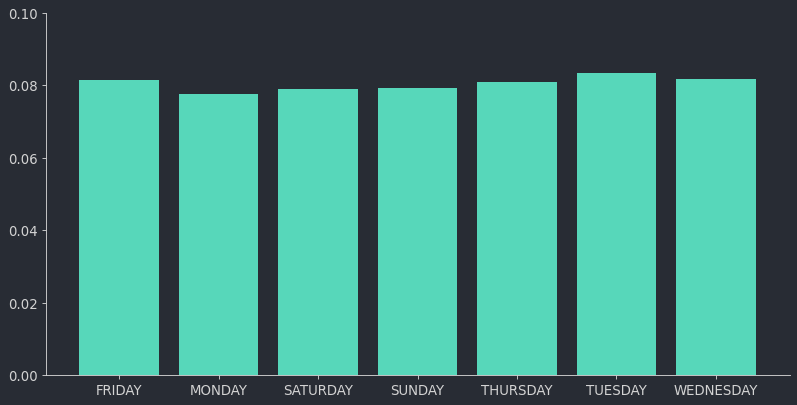

In [334]:
col = 'weekday_appr_process_start'
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x = application_train_df.groupby(col).agg({'target':'mean','sk_id_curr':'count'})['target'].index, height = application_train_df.groupby(col).agg({'target':'mean','sk_id_curr':'count'})['target'].values)

ax.set_ylim(0,0.1)

In [321]:
#funny enough, there does seem to be some correlation with hour of application
def hour_of_application(hour):
    if hour > 20 or hour < 4:
        return 'night'
    elif hour <= 8:
        return 'morning'
    else:
        return 'day'
    


In [318]:
application_train_df.groupby('hour_appr_process_start').agg({'target':'mean','sk_id_curr':'count'})['target'].values

array([0.15      , 0.08139535, 0.09836066, 0.08699187, 0.08277512,
       0.10582738, 0.11040739, 0.10042712, 0.09076486, 0.08205521,
       0.08021844, 0.08074351, 0.08258114, 0.08026745, 0.07907666,
       0.07592898, 0.07461369, 0.06489933, 0.0701735 , 0.06860707,
       0.07023411, 0.0617284 , 0.1       , 0.12195122])

In [399]:
application_train_df['amt_annuity'].value_counts()

amt_annuity
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13672, dtype: int64

In [404]:
#only like 10 of these rows, so we could drop, but It doesn't matter much. will have to score test values with this null anyways
application_train_df['amt_annuity'].fillna(np.mean(application_train_df['amt_annuity']),inplace=True)

In [408]:
#same logic as above. Although these are revolving loans and t here are 300 of them (1% of revolving values) -- Might be worth dropping
#TODO: Evaluate if we should drop these
application_train_df['amt_goods_price'].fillna(np.mean(application_train_df['amt_goods_price']),inplace=True)

In [403]:
application_train_df['name_contract_type'].value_counts()

name_contract_type
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [412]:
application_train_df['amt_req_credit_bureau_hour'].value_counts()

amt_req_credit_bureau_hour
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [410]:
application_train_df.isna().sum()[60:] / len(application_train_df)

flag_document_15              0.000000
flag_document_16              0.000000
flag_document_17              0.000000
flag_document_18              0.000000
flag_document_19              0.000000
flag_document_20              0.000000
flag_document_21              0.000000
amt_req_credit_bureau_hour    0.135016
amt_req_credit_bureau_day     0.135016
amt_req_credit_bureau_week    0.135016
amt_req_credit_bureau_mon     0.135016
amt_req_credit_bureau_qrt     0.135016
amt_req_credit_bureau_year    0.135016
has_children                  0.000000
has_multiple_children         0.000000
lives_alone                   0.000000
null_ext_source_1             0.000000
null_ext_source_3             0.000000
null_social_circle            0.000000
dtype: float64

In [ ]:
#Tomorrow TODO: dummy variables and run initial models.